In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
%pip install -U kaleido
import kaleido

Note: you may need to restart the kernel to use updated packages.


In [2]:
df = pd.read_csv('data/Exportacions_realitzades_per_Catalunya_a_nivell_mundial_SankeyDiagram.csv')
df

,Any,Codi país,Codi país ISO,País,Import,Estat
0,1994,AD,NaN,Andorra,200218.30,D
1,1994,AE,NaN,"Emirats Àrabs Units, els",31376.74,D
2,1994,AF,NaN,Afganistan,10.99,D
3,1994,AG,NaN,Antigua i Barbuda,157.69,D
4,1994,AI,NaN,Anguilla,340.16,D
...,...,...,...,...,...,...
5979,2020,XS,NaN,Sèrbia,103301.16,P
5980,2020,YE,NaN,"Iemen, el",11248.92,P
5981,2020,ZA,NaN,Sud-àfrica,257427.50,P
5982,2020,ZM,NaN,Zàmbia,1598.99,P


In [3]:
df_filter = df[df.Any.isin([2015, 2016, 2017])]# or (df['País'] ==  'Alemanya')]
df_final_filter =df_filter[df.País.isin(['França', 'Alemanya'])]
print(df_final_filter)

       Any Codi país  Codi país ISO      País      Import Estat
4622  2015        DE            NaN  Alemanya   7588443.5     D
4638  2015        FR            NaN    França   9821419.0     D
4860  2016        DE            NaN  Alemanya   7749042.0     D
4875  2016        FR            NaN    França  10450995.0     D
5095  2017        DE            NaN  Alemanya   7508991.0     D
5112  2017        FR            NaN    França  11208210.0     D


/tmp/ipykernel_9767/799972696.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_final_filter =df_filter[df.País.isin(['França', 'Alemanya'])]


In [4]:
source = list(df_final_filter['Any'])
target = list(df_final_filter['País'])
value = list(df_final_filter['Import'])
new_source_cat = [2, 2, 3, 3, 4, 4]
print(source)
print(new_source_cat)
print(target)
print(value)

[2015, 2015, 2016, 2016, 2017, 2017]
[2, 2, 3, 3, 4, 4]
['Alemanya', 'França', 'Alemanya', 'França', 'Alemanya', 'França']
[7588443.5, 9821419.0, 7749042.0, 10450995.0, 7508991.0, 11208210.0]


In [5]:
target_num = []
for i in range(0, len(target)):
    if target[i] == 'França':
        target_num.append(0)
    if target[i] == 'Alemanya':
        target_num.append(1)

In [6]:
label = ['França', 'Alemanya', '2015', '2016', '2017']

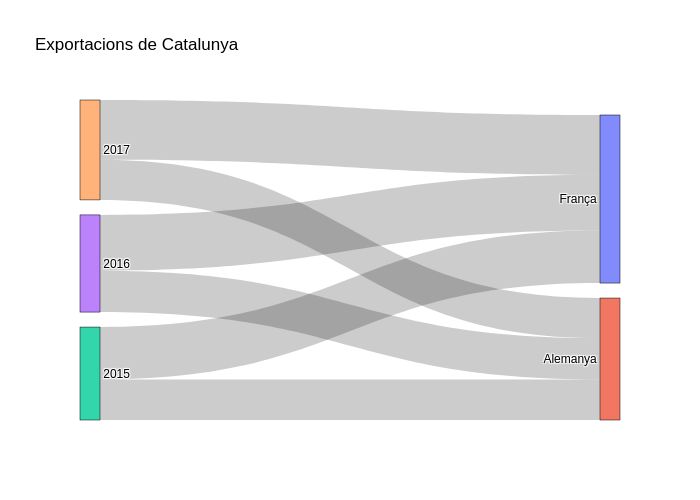

In [10]:
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=label,
    ),
    link=dict(
        source=new_source_cat,
        target=target_num,
        value=value
    )
)])

fig.update_layout(
    title_text="Exportacions de Catalunya",
    font=dict(size=12, color="black"),
)

fig.show("png")